Bhavesh Waghela - 
N01639685

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# from matplotlib import style
# style.use('dark_background')

In [4]:
img1 = cv2.imread('/content/drive/MyDrive/Image Processing Humber/Car.png', 0)

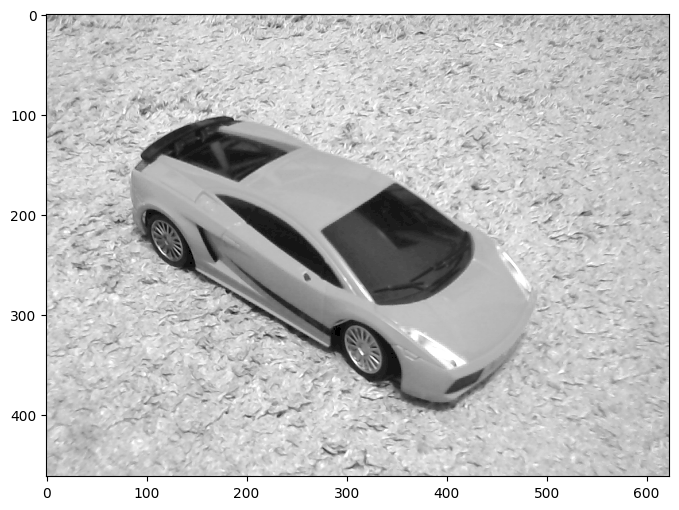

In [5]:
plt.figure(figsize=(12,6))
plt.imshow(img1, cmap = 'gray')
plt.show()

In [6]:
#Image output is a 2D complex array. 1st channel is real and 2nd imaginary. For FFT (fast Fourier transform) in OpenCV,
#the input image needs to be converted to float32 and the output will be complex output, which means we need to extract
#the magnitude out of this Complex number.

dft = cv2.dft(np.float32(img1),flags = cv2.DFT_COMPLEX_OUTPUT)

In [7]:
dft.shape

(462, 623, 2)

In [8]:
# Rearranges a Fourier transform by shifting the zero-frequency component to the center of the array. Otherwise,
#it starts at the top left corner of the image (array).

dft_shift1 = np.fft.fftshift(dft)

In [9]:
dft_shift1.dtype

dtype('float32')

In [10]:
#The magnitude of the function is 20. log(abs(f)), For values that are 0 we may end up with indeterminate values for log.
#So we can add 1 to the array to avoid seeing a warning. dft_shift[:, :,0] will be a real part dft[:, :, 1] will be an imaginary
#part.

magnitude_spectrum1 = 20*np.log(cv2.magnitude(dft_shift1[:,:,0], dft_shift1[:,:,1]) )

In [11]:
magnitude_spectrum1.shape

(462, 623)

In [12]:
magnitude_spectrum1.dtype

dtype('float32')

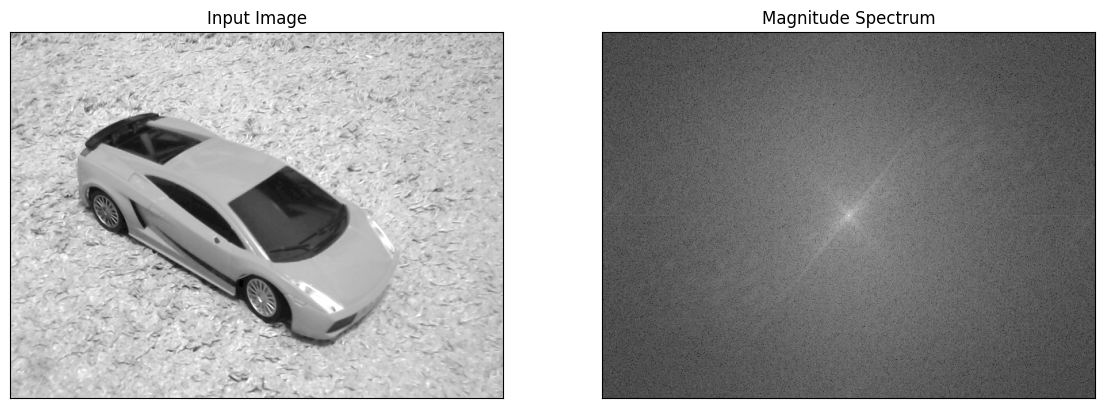

In [13]:
# visualize input image and the magnitude spectrum
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(img1, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([])
plt.yticks([])
plt.show()

LOW PASS FILTER

In [75]:
def low_pass_filter(image, radious):
  image_to_mask = image
  rows, cols = image_to_mask.shape
  crow, ccol = rows//2 , cols//2     # center

  # create a mask first, center square is 1, remaining all zeros
  mask = np.zeros((rows, cols, 2), np.float32)

  #Note that the the mask.shape is (rows, cols, 2) which matches the returned np.ndarray from cv2.dft().
  r = radious
  center = [crow, ccol]
  x, y = np.ogrid[:rows, :cols]
  mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
  mask[mask_area] = 1

  mask_to_plot = cv2.magnitude(mask[:,:,0] ,mask[:,:,1])

  plt.imshow(mask_to_plot, cmap = 'gray')
  plt.show()

  dft_image = cv2.dft(np.float32(image_to_mask),flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift1_image = np.fft.fftshift(dft_image)

  # apply mask and inverse DFT
  fshift = dft_shift1_image * mask
  f_ishift = np.fft.ifftshift(fshift)
  img_back = cv2.idft(f_ishift)
  img_back_image = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

  return img_back_image

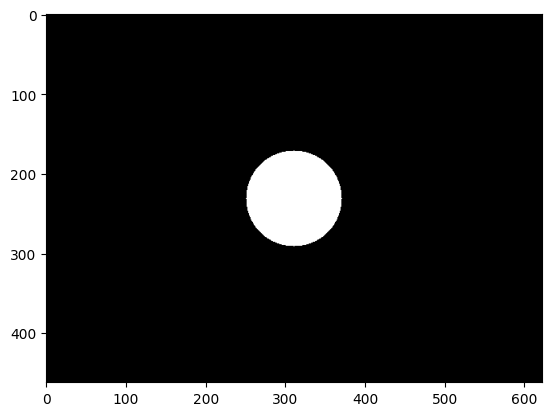

In [82]:
car = cv2.imread('/content/drive/MyDrive/Image Processing Humber/Car.png', 0)

masked_car = low_pass_filter(car, 60)

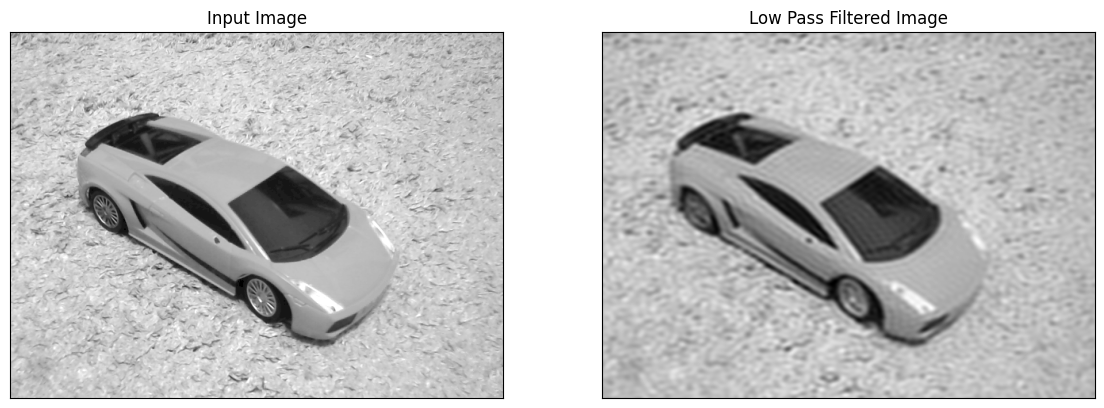

In [83]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(car, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(masked_car, cmap = 'gray')
plt.title('Low Pass Filtered Image')
plt.xticks([])
plt.yticks([])
plt.show()

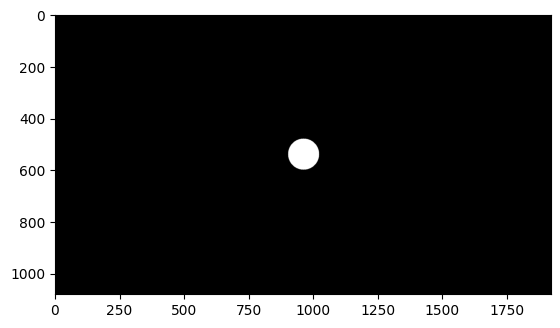

In [84]:
bus = cv2.imread('/content/drive/MyDrive/Image Processing Humber/SchoolBus.png', 0)

masked_bus = low_pass_filter(bus,60)

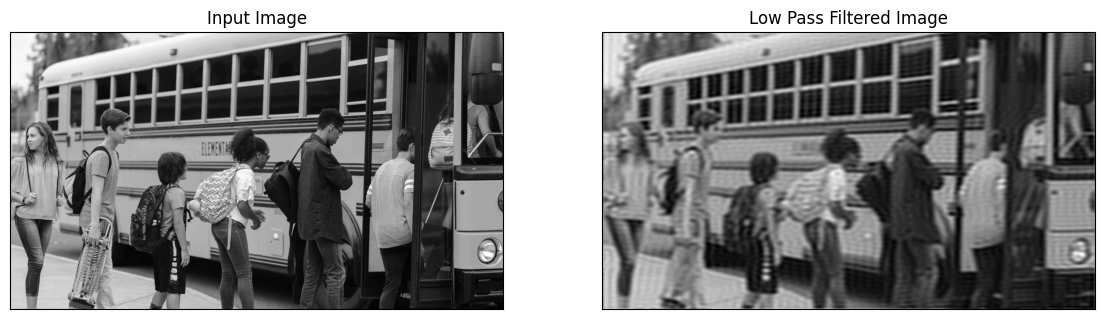

In [85]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(bus, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(masked_bus, cmap = 'gray')
plt.title('Low Pass Filtered Image')
plt.xticks([])
plt.yticks([])
plt.show()

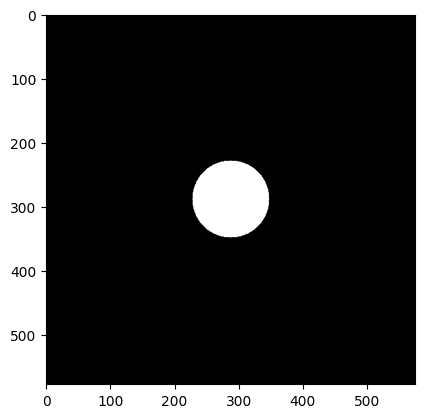

In [86]:
shapes = cv2.imread('/content/drive/MyDrive/Image Processing Humber/Geometrical_Shapes.png', 0)

masked_shapes = low_pass_filter(shapes, 60)

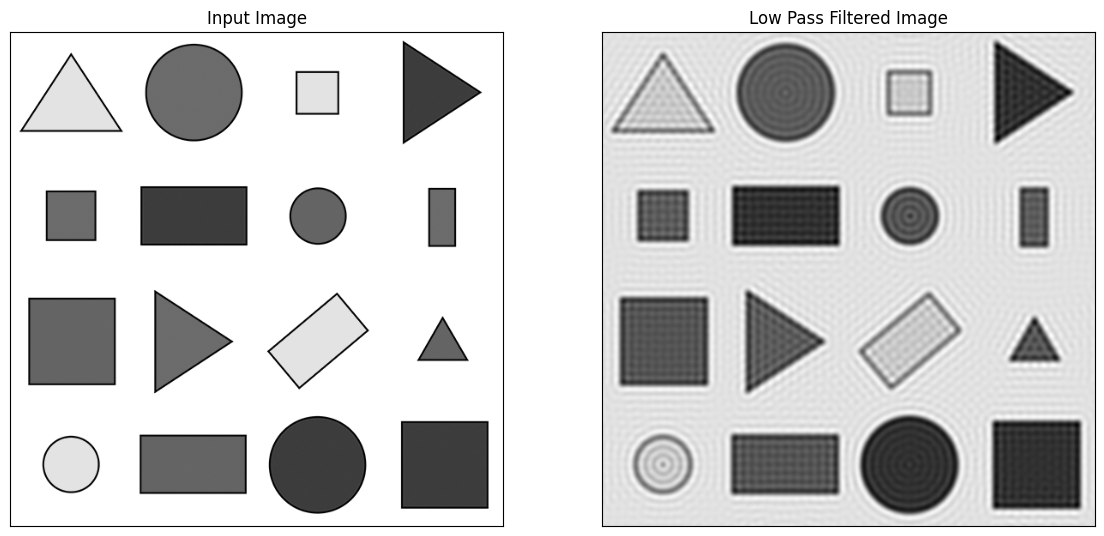

In [87]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(shapes, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(masked_shapes, cmap = 'gray')
plt.title('Low Pass Filtered Image')
plt.xticks([])
plt.yticks([])
plt.show()

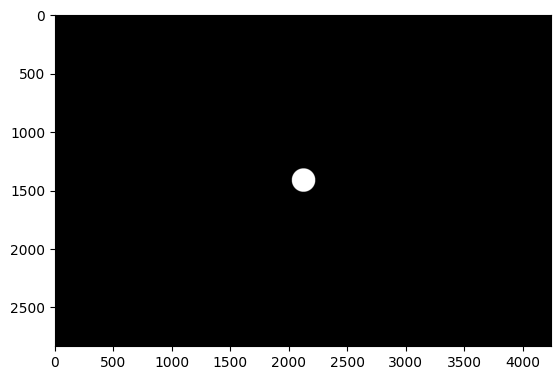

In [88]:
workers = cv2.imread('/content/drive/MyDrive/Image Processing Humber/Workers.jpg', 0)

masked_workers = low_pass_filter(workers, 100)

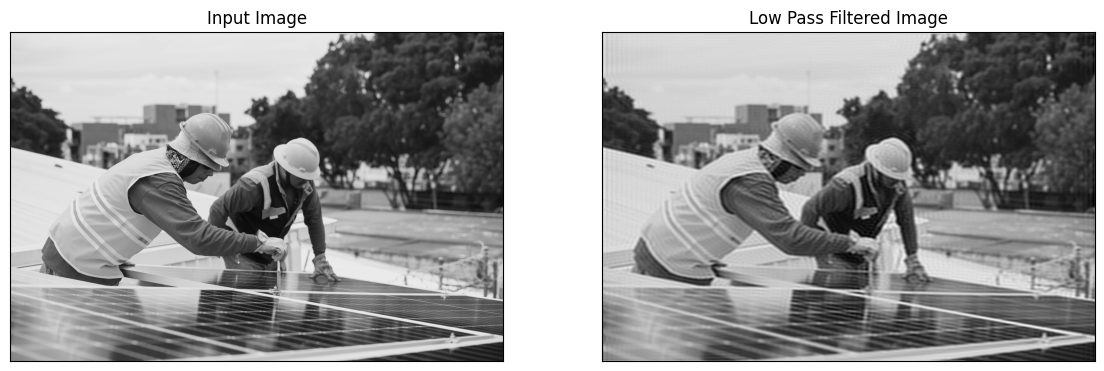

In [89]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(workers, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(masked_workers, cmap = 'gray')
plt.title('Low Pass Filtered Image')
plt.xticks([])
plt.yticks([])
plt.show()

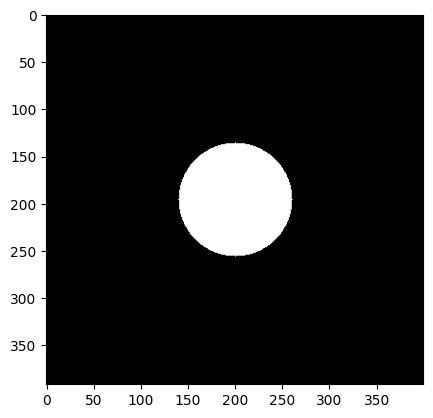

In [158]:
txt_img = cv2.imread('/content/drive/MyDrive/Image Processing Humber/Text.png', 0)
masked_txt_img = low_pass_filter(txt_img, 60)

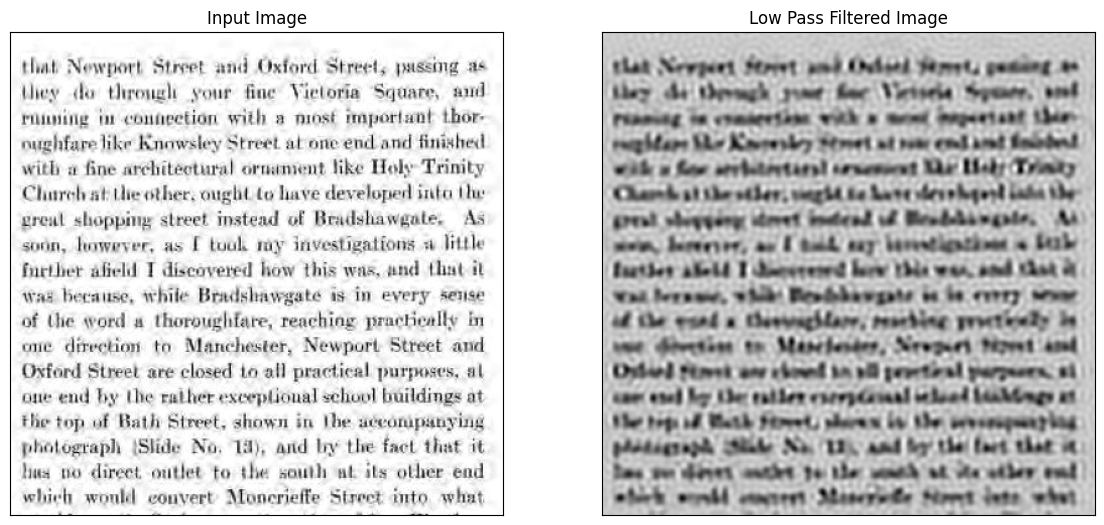

In [159]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(txt_img, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(masked_txt_img, cmap = 'gray')
plt.title('Low Pass Filtered Image')
plt.xticks([])
plt.yticks([])
plt.show()

HIGH PASS FILTER

In [90]:
def high_pass_filter(image, radious):
  image_to_mask = image
  rows, cols = image_to_mask.shape
  crow, ccol = rows//2 , cols//2     # center

  # create a mask first, center square is 1, remaining all zeros
  mask = np.ones((rows, cols, 2), np.float32)

  #Note that the the mask.shape is (rows, cols, 2) which matches the returned np.ndarray from cv2.dft().
  r = radious
  center = [crow, ccol]
  x, y = np.ogrid[:rows, :cols]
  mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
  mask[mask_area] = 0

  mask_to_plot = cv2.magnitude(mask[:,:,0] ,mask[:,:,1])

  plt.imshow(mask_to_plot, cmap = 'gray')
  plt.show()

  dft_image = cv2.dft(np.float32(image_to_mask),flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift1_image = np.fft.fftshift(dft_image)

  # apply mask and inverse DFT
  fshift = dft_shift1_image * mask
  f_ishift = np.fft.ifftshift(fshift)
  img_back = cv2.idft(f_ishift)
  img_back_image = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

  return img_back_image

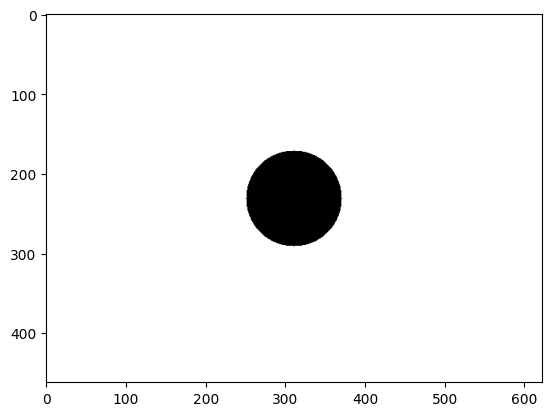

In [91]:
high_masked_car = high_pass_filter(car, 60)

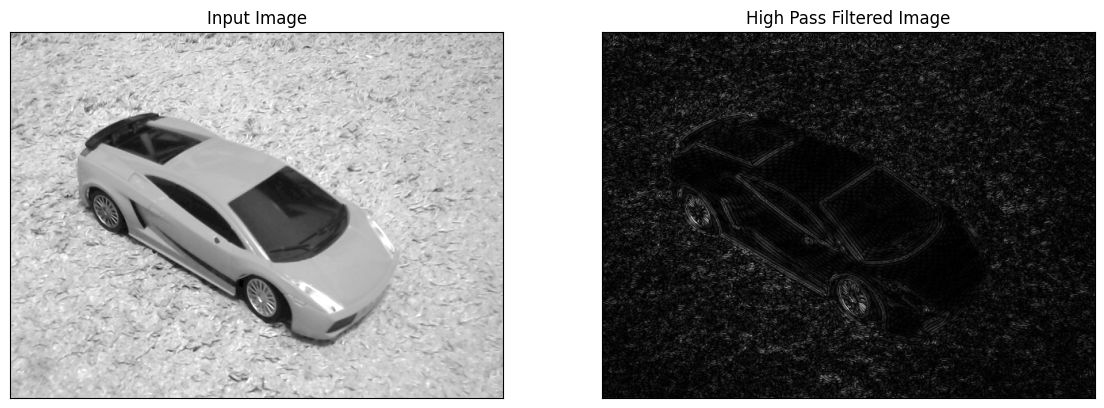

In [166]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(car, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(high_masked_car, cmap = 'gray')
plt.title('High Pass Filtered Image')
plt.xticks([])
plt.yticks([])
plt.show()

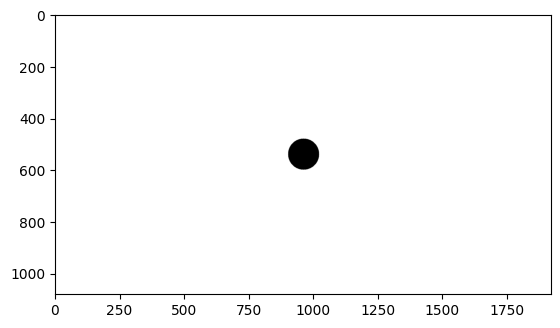

In [93]:
high_masked_bus = high_pass_filter(bus, 60)

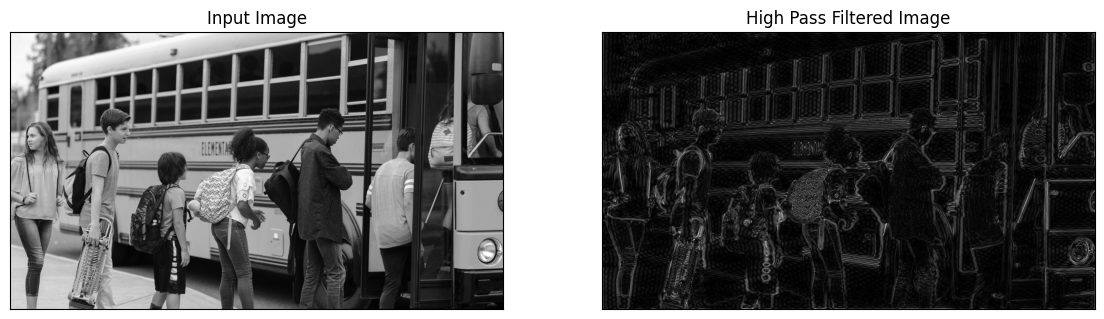

In [165]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(bus, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(high_masked_bus, cmap = 'gray')
plt.title('High Pass Filtered Image')
plt.xticks([])
plt.yticks([])
plt.show()

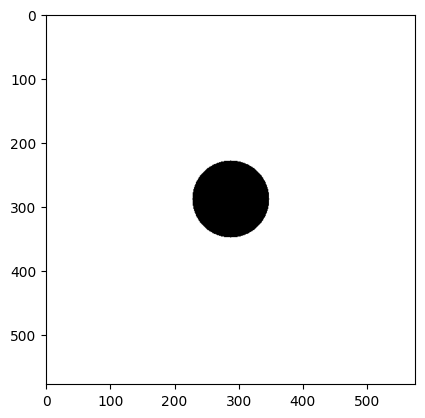

In [96]:
high_masked_shapes = high_pass_filter(shapes, 60)

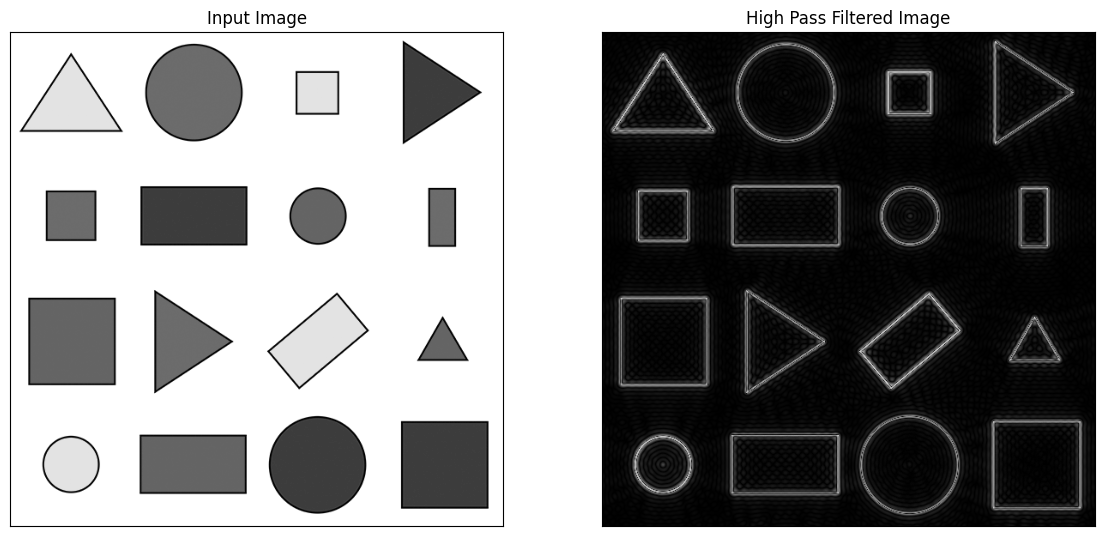

In [164]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(shapes, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(high_masked_shapes, cmap = 'gray')
plt.title('High Pass Filtered Image')
plt.xticks([])
plt.yticks([])
plt.show()

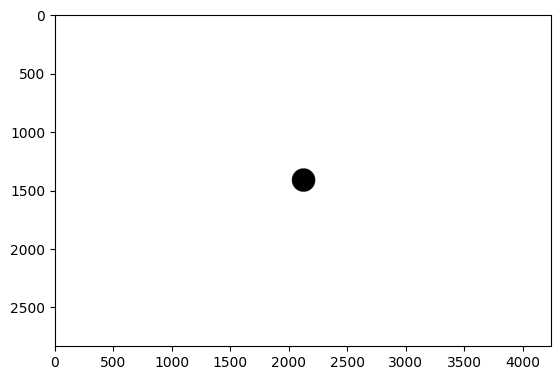

In [101]:
high_masked_workers = high_pass_filter(workers, 100)

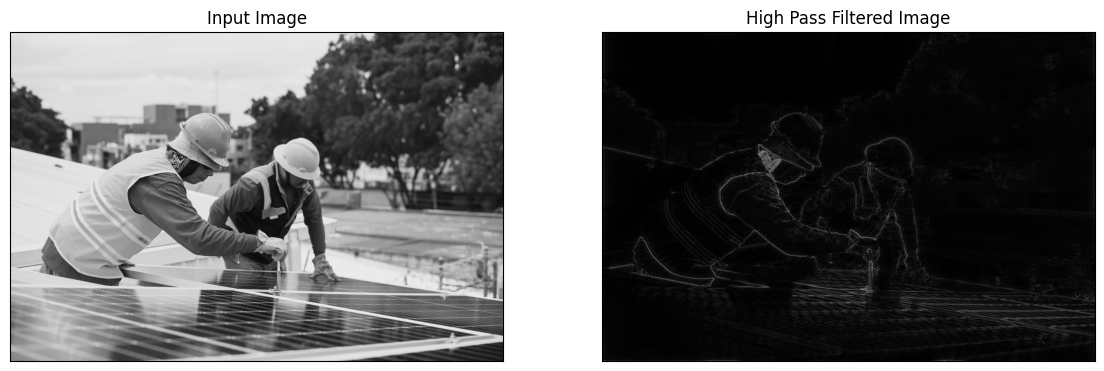

In [163]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(workers, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(high_masked_workers, cmap = 'gray')
plt.title('High Pass Filtered Image')
plt.xticks([])
plt.yticks([])
plt.show()

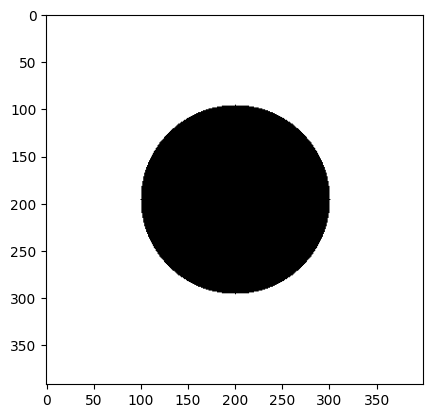

In [160]:
high_masked_txt_img = high_pass_filter(txt_img, 100)

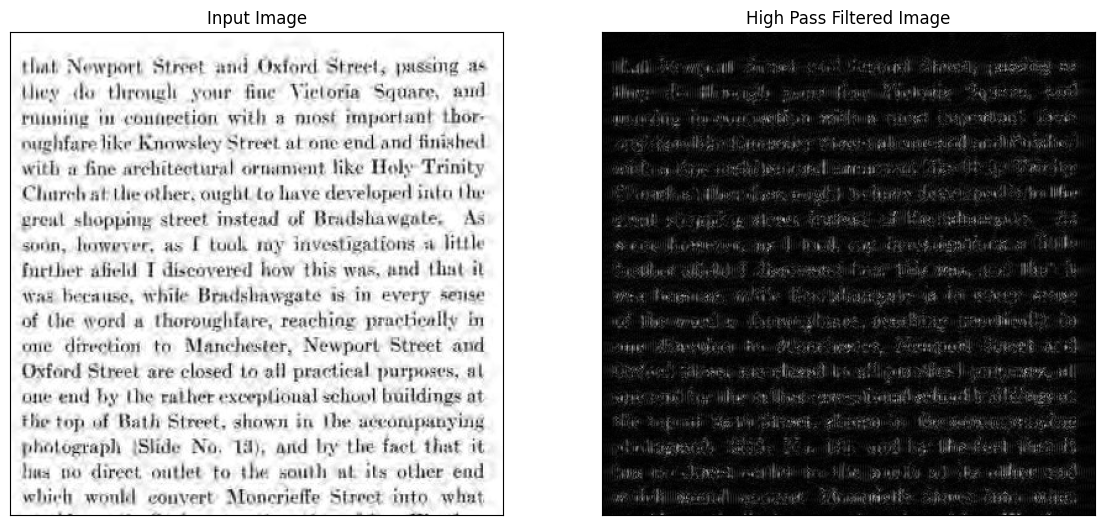

In [162]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.imshow(txt_img, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(high_masked_txt_img, cmap = 'gray')
plt.title('High Pass Filtered Image')
plt.xticks([])
plt.yticks([])
plt.show()

Thresholding to improve the visiblity of the text image.

In [106]:
txt_img = cv2.imread('/content/drive/MyDrive/Image Processing Humber/Text.png')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 250, 250],
        [251, 251, 251],
        [252, 252, 252]],

       [[254, 254, 254],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [251, 251, 251],
        [252, 252, 252],
        [253, 253, 253]],

       [[253, 253, 253],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [251, 251, 251],
        [253, 253, 253],
        [254, 254, 254]]], dtype=uint8)
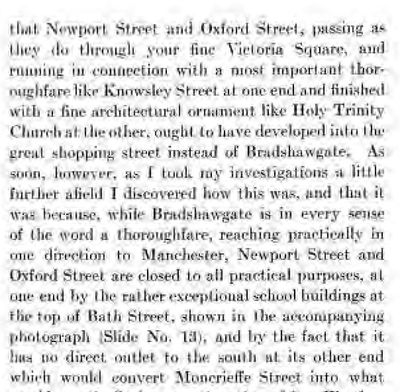

In [107]:
txt_img

Binary Threshold


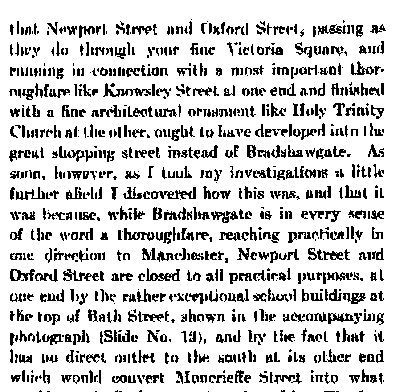

Binary Threshold Inverted


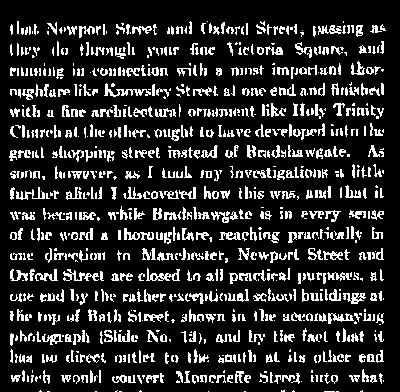

Truncated Threshold


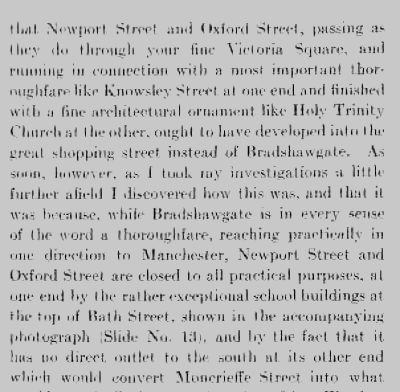

Set to 0


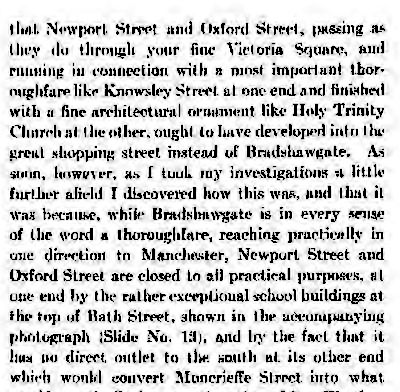

Set to 0 Inverted


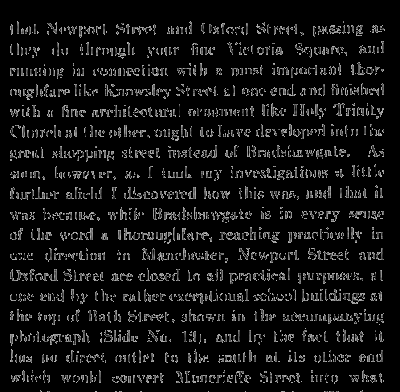

In [170]:
from google.colab.patches import cv2_imshow
# applying different thresholding
# techniques on the input image
# all pixels value above 120 will
# be set to 255
ret, thresh1 = cv2.threshold(img, 195, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 190, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 200, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 180, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 180, 255, cv2.THRESH_TOZERO_INV)

# the window showing output images
# with the corresponding thresholding
# techniques applied to the input images
print('Binary Threshold')
cv2_imshow(thresh1)
print('Binary Threshold Inverted')
cv2_imshow(thresh2)
print('Truncated Threshold')
cv2_imshow(thresh3)
print('Set to 0')
cv2_imshow(thresh4)
print('Set to 0 Inverted')
cv2_imshow(thresh5)

# De-allocate any associated memory usage
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()